##Installation des bibliothèques

In [1]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


##Importation des bibliothèques

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay,roc_auc_score,roc_curve
from sklearn import metrics
import pickle
%matplotlib inline

#Train test Split
from sklearn.model_selection import train_test_split

#Applying Standardization
from sklearn.preprocessing import StandardScaler

#OneHotEncoding
from sklearn.preprocessing import OneHotEncoder

#Dealing with imbalanced dataset SMOTENC
from imblearn.over_sampling import SMOTENC

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

##Importation de la base de données

In [5]:
df = pd.read_csv("/home/youness/Downloads/dossier_detection_fraude/insurance_claims.csv")

#Analyse exploartoire de la base de données

In [6]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [7]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [10]:
df['policy_annual_premium'] = df['policy_annual_premium'].astype('int64')

In [11]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [12]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

#recherche de valeurs uniques

In [13]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           612
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [14]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i, "i", df[i].nunique())

policy_bind_date i 951
policy_state i 3
policy_csl i 3
insured_sex i 2
insured_education_level i 7
insured_occupation i 14
insured_hobbies i 20
insured_relationship i 6
incident_date i 60
incident_type i 4
collision_type i 4
incident_severity i 4
authorities_contacted i 4
incident_state i 7
incident_city i 7
incident_location i 1000
property_damage i 3
police_report_available i 3
auto_make i 14
auto_model i 39
fraud_reported i 2


#Nous avons des '?' dans trois colonnes [collision_type, property_damage, police_report_available] et nous les remplacerons par NaN

In [15]:
df.replace('?',np.nan,inplace=True)

#Remplacer les NaN avec le mode pour les colones avec NaN

In [16]:
df['collision_type'] =df['collision_type'].fillna(df['collision_type'].mode()[0])

In [17]:
df['property_damage'] =df['property_damage'].fillna(df['property_damage'].mode()[0])

In [18]:
df['police_report_available'] =df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [19]:
countplot_columns = ['insured_sex','incident_type','collision_type','incident_severity','witnesses','property_damage','authorities_contacted']

In [20]:
list(enumerate(countplot_columns))

[(0, 'insured_sex'),
 (1, 'incident_type'),
 (2, 'collision_type'),
 (3, 'incident_severity'),
 (4, 'witnesses'),
 (5, 'property_damage'),
 (6, 'authorities_contacted')]

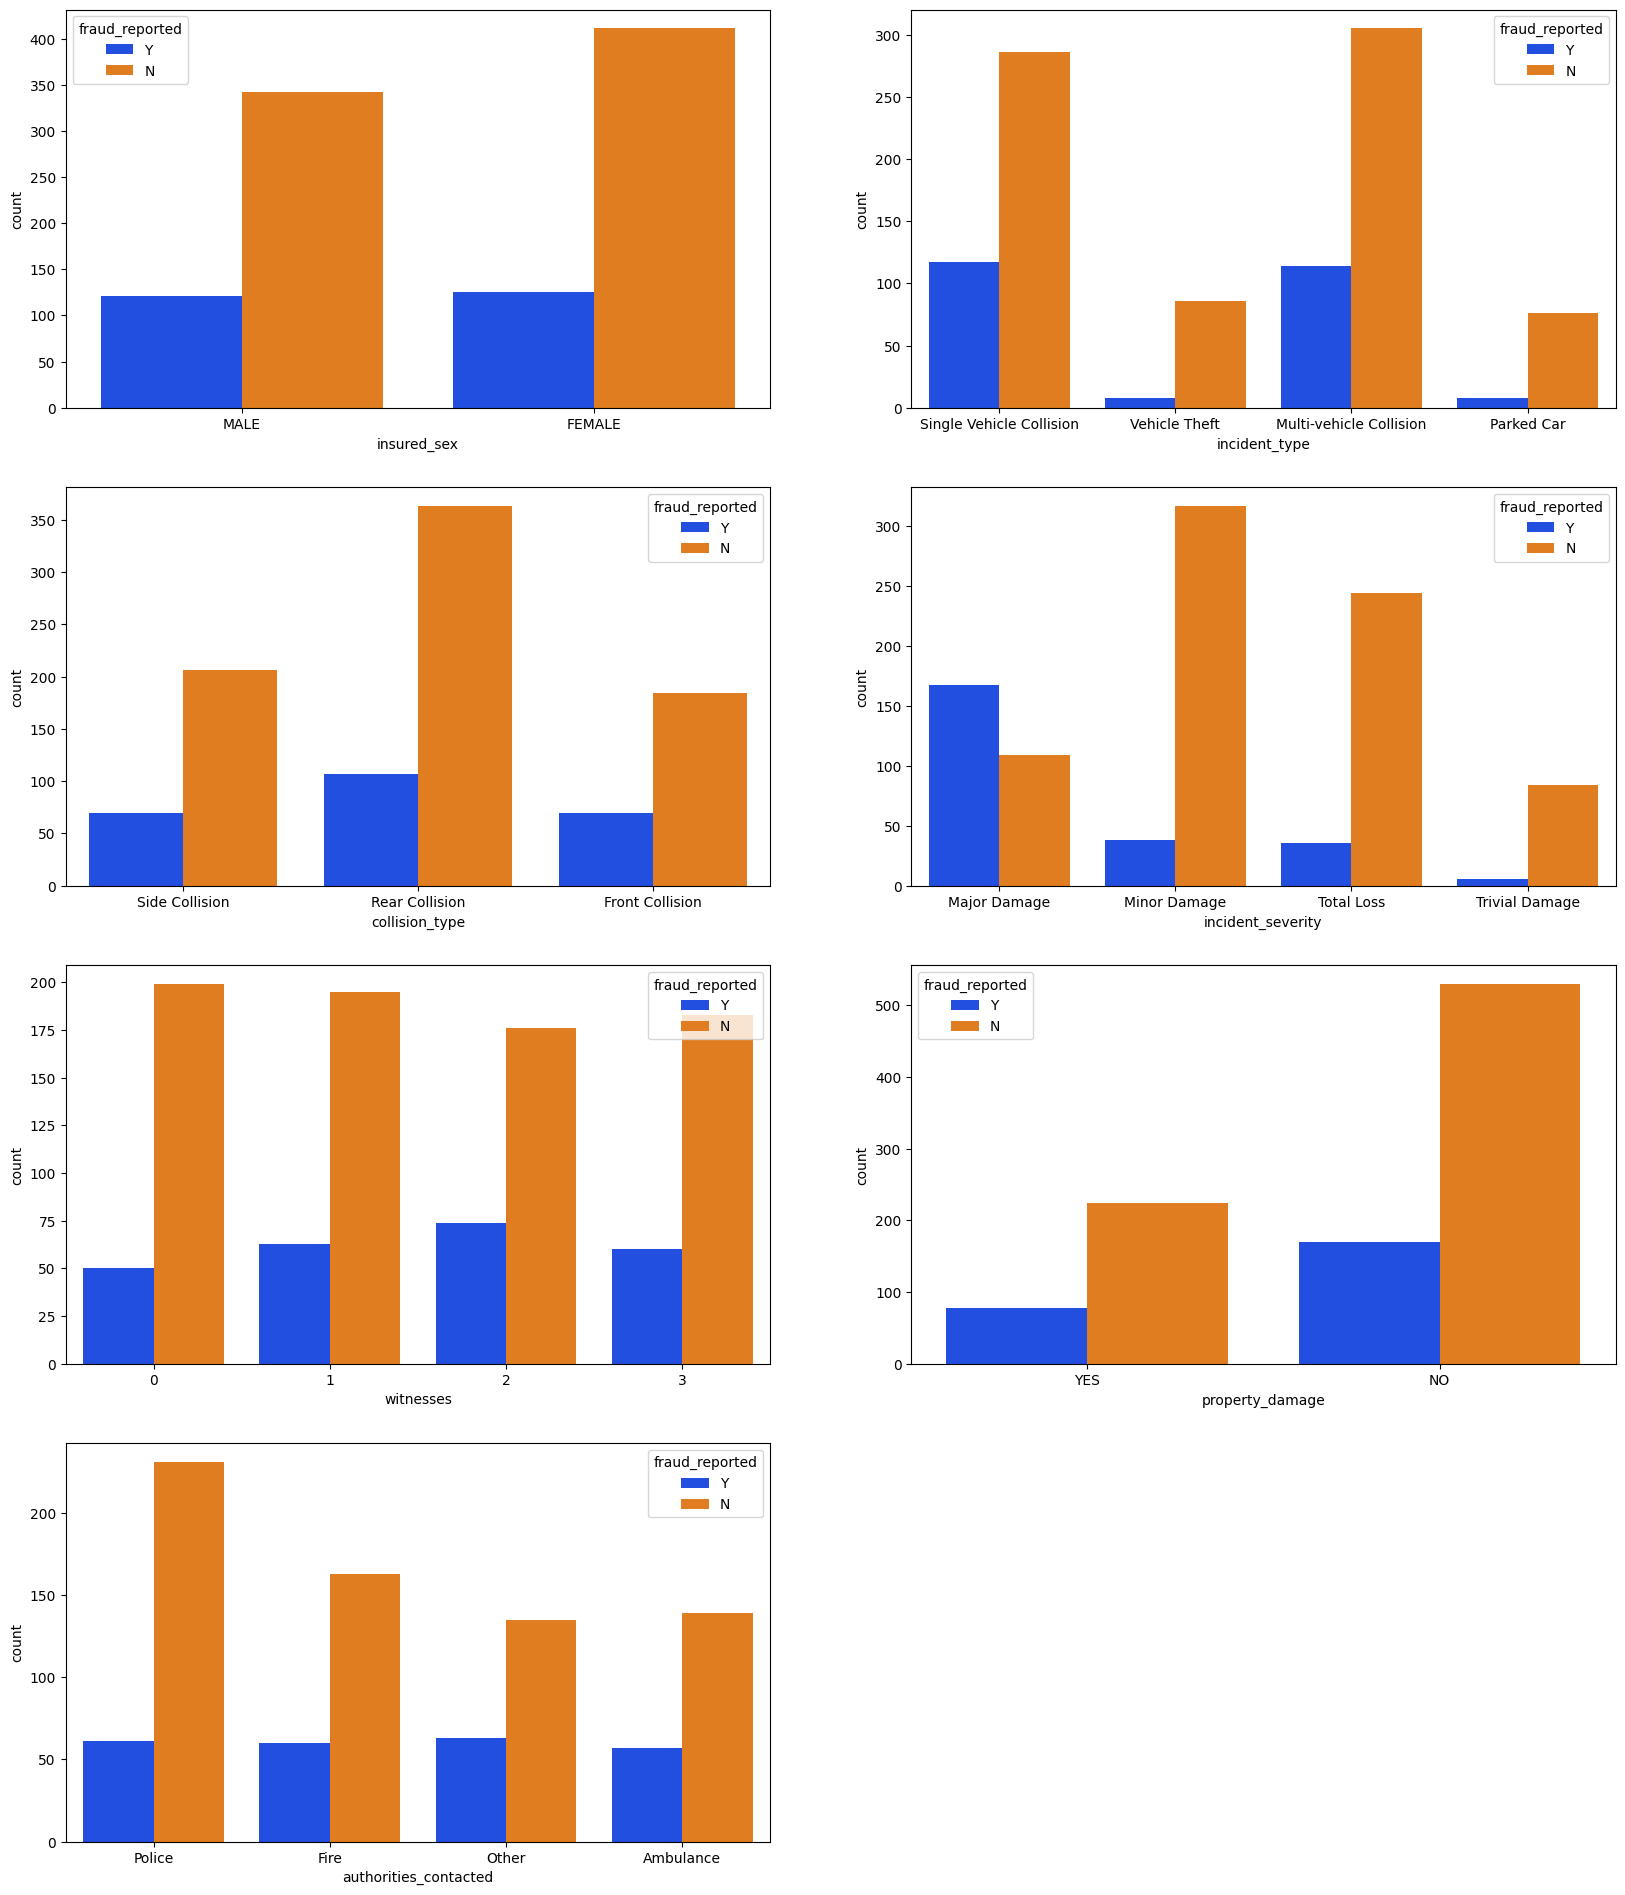

In [21]:
plt.figure(figsize=[20,30])
for i in enumerate(countplot_columns):
    plt.subplot(5,2,i[0]+1)     
    sns.countplot(data=df, x =i[1],hue='fraud_reported',palette='bright')

In [22]:
histplot_columns = ['policy_deductable','policy_annual_premium', 'umbrella_limit','capital-gains','capital-loss','months_as_customer','age','total_claim_amount']

In [23]:
list(enumerate(histplot_columns))

[(0, 'policy_deductable'),
 (1, 'policy_annual_premium'),
 (2, 'umbrella_limit'),
 (3, 'capital-gains'),
 (4, 'capital-loss'),
 (5, 'months_as_customer'),
 (6, 'age'),
 (7, 'total_claim_amount')]

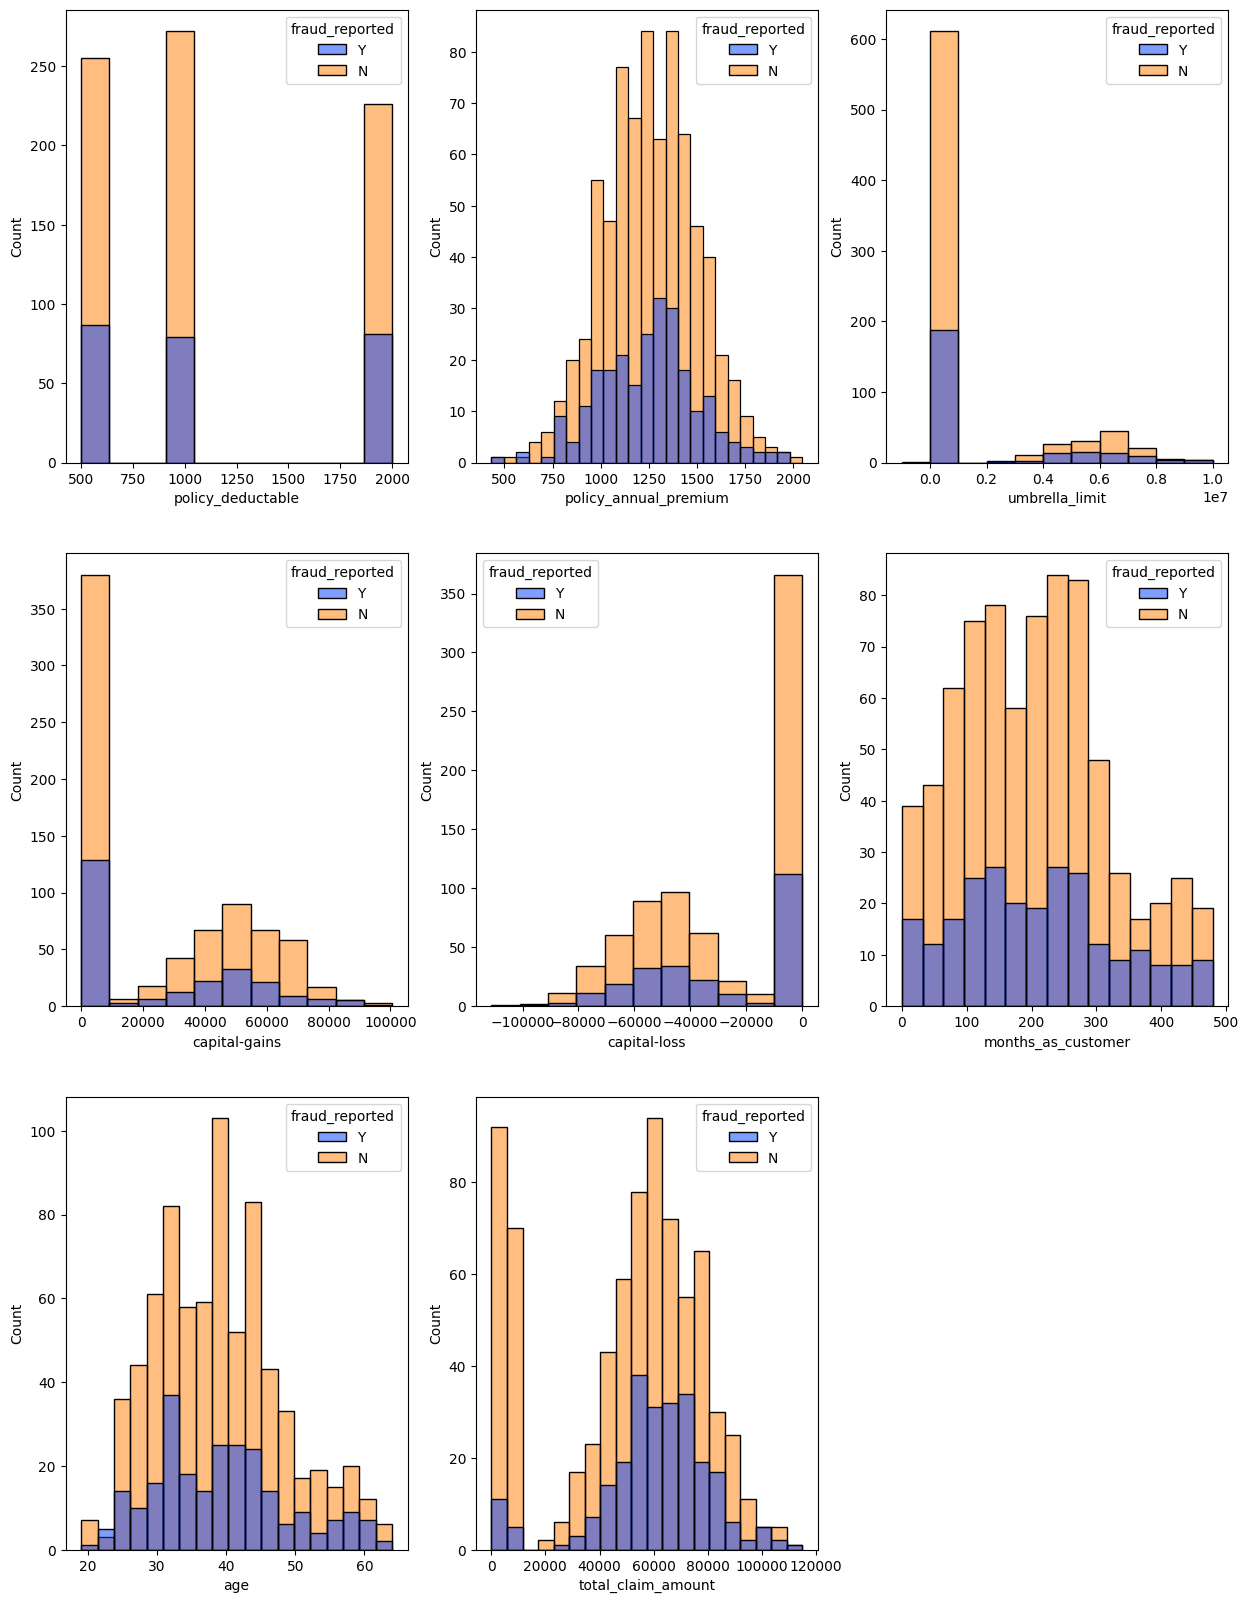

In [24]:
plt.figure(figsize=[15,20])
for z in enumerate(histplot_columns):
    plt.subplot(3,3,z[0]+1)
    sns.histplot(df,x =z[1],hue='fraud_reported',palette='bright')

<Axes: xlabel='insured_hobbies', ylabel='count'>

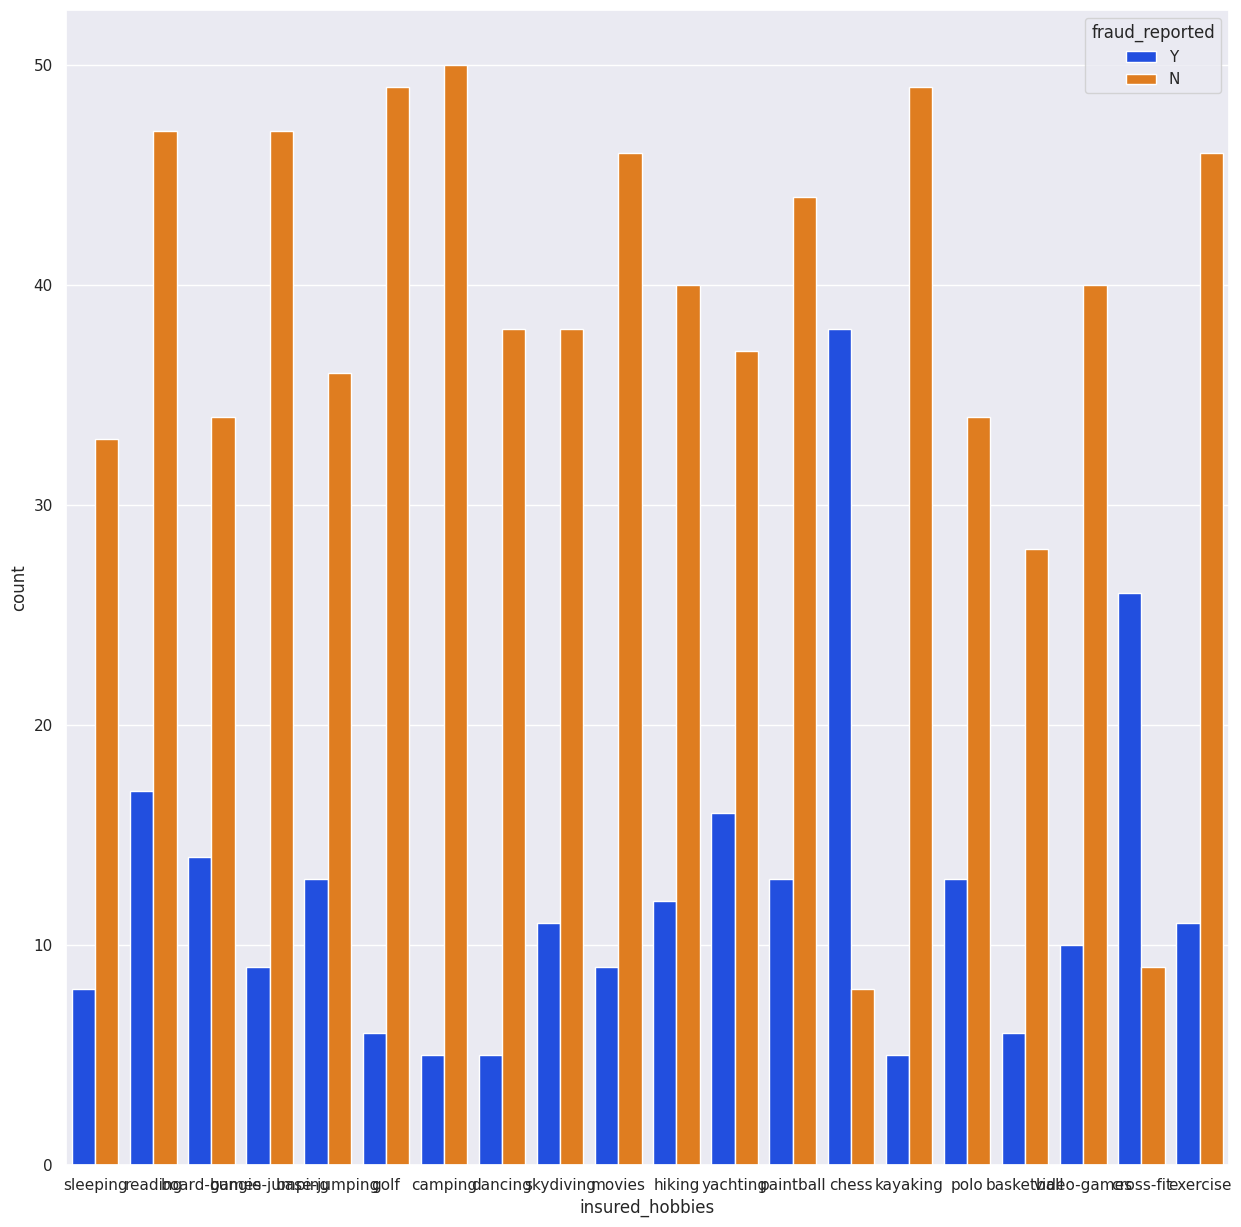

In [25]:
sns.set(rc={'figure.figsize':(15,15)})
sns.countplot(x='insured_hobbies',data=df,hue='fraud_reported',palette='bright')

<Axes: xlabel='auto_model', ylabel='count'>

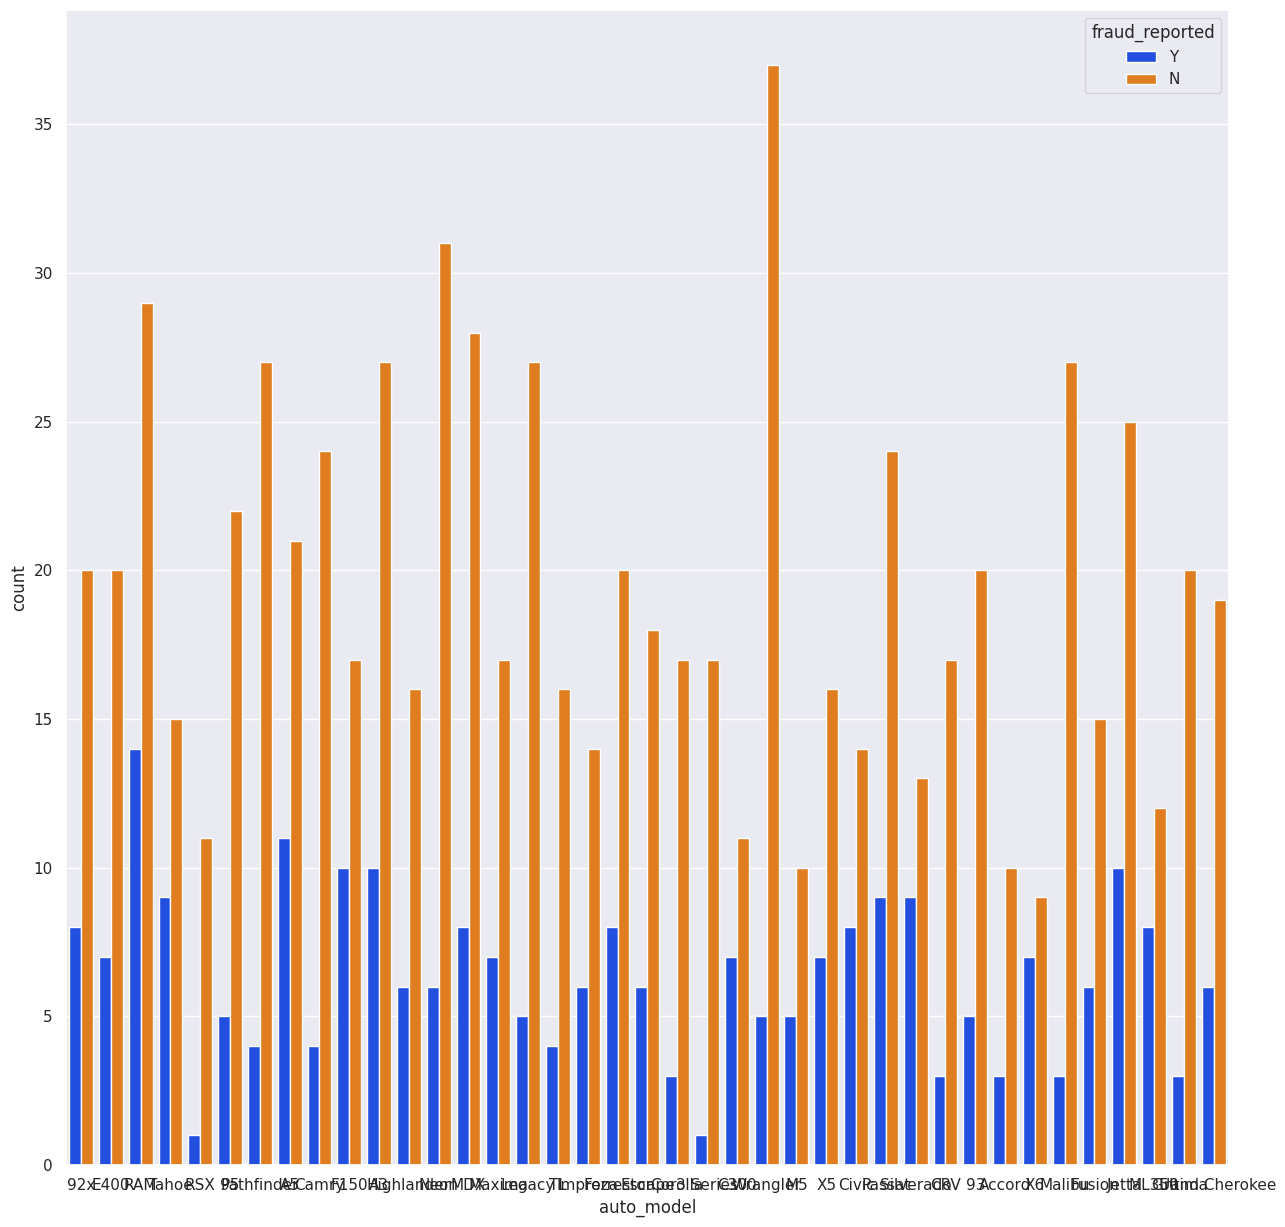

In [26]:
sns.countplot(data=df,x='auto_model',hue='fraud_reported',palette='bright')

In [27]:
df['fraud_reported'] = pd.get_dummies(df['fraud_reported'],drop_first=True,dtype=np.int64)

In [28]:
df['fraud_reported'].value_counts()

fraud_reported
0    753
1    247
Name: count, dtype: int64

#Les données sont déséquilibrées. Nous appliquerons SMOTENC à ce jeu de données plus tard pour l'équilibrage 

#Indentification des correlations entre les variables

In [29]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium            int64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [30]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

#conversion des dates du format object en format datetime ou int

In [31]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])

In [32]:
unique_policy_states = df['policy_state'].unique()

In [33]:
print(unique_policy_states)

['OH' 'IN' 'IL']


In [34]:
# Mappage des codes d'état à des valeurs numériques
state_mapping = {'OH': 1, 'IN': 2, 'IL': 3}

# Appliquer le mappage à la colonne policy_state
df['policy_state'] = df['policy_state'].map(state_mapping)

In [35]:
df['policy_state'] = (df['policy_state']).astype(int)

In [36]:
col_drop = ['policy_number','policy_bind_date','policy_state','policy_csl','policy_annual_premium','insured_zip','insured_hobbies','insured_relationship','capital-gains','capital-loss','incident_date','incident_state','incident_city','incident_location','injury_claim','property_claim','vehicle_claim','auto_make','auto_model','auto_year','_c39']

In [37]:
df.drop(col_drop,axis=1,inplace=True)

In [38]:
num_df = df.select_dtypes(include = ['int64']).drop('fraud_reported', axis=1)

In [39]:
num_df.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount'],
      dtype='object')

In [40]:
num_df_col_names = num_df.columns

In [41]:
cat_df = df.select_dtypes(include = ['object'])

In [42]:
cat_df.columns

Index(['insured_sex', 'insured_education_level', 'insured_occupation',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'property_damage', 'police_report_available'],
      dtype='object')

#Nous allons appliquer le OneHotEncoding sur tous les variables catégorielles

In [43]:
enc = OneHotEncoder(handle_unknown='ignore',drop='first')
cat_enc_data=pd.DataFrame(enc.fit_transform(df[['insured_sex', 'insured_education_level', 'insured_occupation',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'property_damage', 'police_report_available']]).toarray())

In [44]:
enc.get_feature_names_out()

array(['insured_sex_MALE', 'insured_education_level_College',
       'insured_education_level_High School',
       'insured_education_level_JD', 'insured_education_level_MD',
       'insured_education_level_Masters', 'insured_education_level_PhD',
       'insured_occupation_armed-forces',
       'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving', 'incident_type_Parked Car',
       'incident_type_Single Vehicle Collision',
       'incident_type_Vehicle Theft', 'collision_type_Rear Collision',
       'collision_type_Side Collision', 'in

In [45]:
cat_enc_data.columns = enc.get_feature_names_out()

In [46]:
cat_enc_data

,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,authorities_contacted_nan,property_damage_YES,police_report_available_YES
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
997,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [47]:
X = pd.concat([num_df, cat_enc_data], axis = 1)

In [48]:
y = df['fraud_reported']

diviser les données en ensemble d'entrainement et de test

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123,stratify=y)

Standardiser les données

In [50]:
scaler = StandardScaler()

In [51]:
X_train_num_scaled = pd.DataFrame(scaler.fit_transform(X_train[num_df_col_names]),
columns=num_df_col_names, index= X_train.index)

In [52]:
for col in num_df:
        X_train[col] = X_train_num_scaled[col]

In [53]:
X_test_num_scaled = pd.DataFrame(scaler.fit_transform(X_test[num_df_col_names]),
columns=num_df_col_names, index= X_test.index)

In [54]:
for col in num_df:
        X_test[col] = X_test_num_scaled[col]

In [55]:
list(range(len(num_df_col_names),43))

[9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42]

In [56]:
cat_col_index = list(range(len(num_df_col_names),43))

In [57]:
#Instantiate SMOTENC algorith with 60% oversampling
sm = SMOTENC(categorical_features=cat_col_index, random_state=123, sampling_strategy=.6)

In [58]:
X_train, y_train = sm.fit_resample(X_train, y_train)

In [59]:
X_train.value_counts()

months_as_customer  age        policy_deductable  umbrella_limit  incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  witnesses  total_claim_amount  insured_sex_MALE  insured_education_level_College  insured_education_level_High School  insured_education_level_JD  insured_education_level_MD  insured_education_level_Masters  insured_education_level_PhD  insured_occupation_armed-forces  insured_occupation_craft-repair  insured_occupation_exec-managerial  insured_occupation_farming-fishing  insured_occupation_handlers-cleaners  insured_occupation_machine-op-inspct  insured_occupation_other-service  insured_occupation_priv-house-serv  insured_occupation_prof-specialty  insured_occupation_protective-serv  insured_occupation_sales  insured_occupation_tech-support  insured_occupation_transport-moving  incident_type_Parked Car  incident_type_Single Vehicle Collision  incident_type_Vehicle Theft  collision_type_Rear Collision  collision_type_Side Collision  incident_severity

In [60]:
y_train.value_counts()

fraud_reported
0    527
1    316
Name: count, dtype: int64

In [61]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [62]:
#Training dataset
log_reg_pred_train = log_reg.predict(X_train)
log_reg_acc_train = accuracy_score(y_train,log_reg_pred_train)
print("Accuracy of Logistic regression for training data is :","{:.2f}%".format(100*log_reg_acc_train))

#Testing dataset
log_reg_pred_test = log_reg.predict(X_test)
log_reg_acc_test = accuracy_score(y_test,log_reg_pred_test)
print("Accuracy of Logistic regression for testing data is :","{:.2f}%".format(100*log_reg_acc_test ))

Accuracy of Logistic regression for training data is : 85.77%
Accuracy of Logistic regression for testing data is : 77.67%


In [63]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [64]:
##Training dataset
svc_pred_train = svc.predict(X_train)
svc_acc_train = accuracy_score(y_train,svc_pred_train)
print("Accuracy of SVC for training data is :","{:.2f}%".format(100*svc_acc_train))

##Testing dataset
svc_pred_test = svc.predict(X_test)
svc_acc_test = accuracy_score(y_test,svc_pred_test)
print("Accuracy of SVC for testing data is :","{:.2f}%".format(100*svc_acc_test))

Accuracy of SVC for training data is : 90.51%
Accuracy of SVC for testing data is : 78.33%


In [65]:
#Hyperparameter Tuning
params = {
    'C':[50,10,1.0, 0.1, 0.01],
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'gamma': ['scale']
}

grid_search_svc = GridSearchCV(svc,params,cv=5,n_jobs=-1,verbose=1)
grid_search_svc.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             verbose=1)

In [66]:
print(grid_search_svc.best_params_)

{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}


In [67]:
svc = grid_search_svc.best_estimator_

In [68]:
y_pred = svc.predict(X_test)

In [69]:
#Training dataset

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
print("Training accuracy of SVM Tree is:","{:.2f}%".format (100 * svc_train_acc))

#Testing dataset
svc_test_acc = accuracy_score(y_test, y_pred)
print("Testing accuracy of SVM Tree is:","{:.2f}%".format (100 * svc_test_acc))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of SVM Tree is: 90.51%
Testing accuracy of SVM Tree is: 78.33%
[[198  28]
 [ 37  37]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       226
           1       0.57      0.50      0.53        74

    accuracy                           0.78       300
   macro avg       0.71      0.69      0.70       300
weighted avg       0.78      0.78      0.78       300



In [70]:
Knn = KNeighborsClassifier(n_neighbors=30)

In [71]:
Knn.fit(X_train, y_train)
y_pred = Knn.predict(X_test)

In [72]:
#Training dataset
Knn_train_acc = accuracy_score(y_train,Knn.predict(X_train))
print("Training score of KNN is :","{:.2f}%".format (100 *Knn_train_acc))

#Testing dataset
Knn_test_acc = accuracy_score(y_test,y_pred)
print("Testing score of KNN is : ","{:.2f}%".format (100 *Knn_test_acc))
      
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training score of KNN is : 69.51%
Testing score of KNN is :  60.67%
[[139  87]
 [ 31  43]]
              precision    recall  f1-score   support

           0       0.82      0.62      0.70       226
           1       0.33      0.58      0.42        74

    accuracy                           0.61       300
   macro avg       0.57      0.60      0.56       300
weighted avg       0.70      0.61      0.63       300



In [73]:
#Hyperparameter Tuning
params = {
    'n_neighbors':[5,7,9,11,13,15,17,19,21,23,25,27,29],
    'weights': ['uniform','distance'],
    'metric': ['minkowski','euclidean','manhattan']
}

grid_search_knn = GridSearchCV(Knn,params,cv=10,n_jobs=-1,verbose=1)
grid_search_knn.fit(X_train, y_train)

Fitting 10 folds for each of 78 candidates, totalling 780 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [74]:
print(grid_search_knn.best_params_)

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [75]:
Knn = grid_search_knn.best_estimator_

In [76]:
y_pred = Knn.predict(X_test)

In [77]:
#Training dataset
knn_train_acc = accuracy_score(y_train, Knn.predict(X_train))
print("Training accuracy of SVM Tree is:","{:.2f}%".format (100 * knn_train_acc))

#Testing dataset
knn_test_acc = accuracy_score(y_test, y_pred)
print("Testing accuracy of SVM Tree is:","{:.2f}%".format (100 * knn_test_acc))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of SVM Tree is: 100.00%
Testing accuracy of SVM Tree is: 62.33%
[[141  85]
 [ 28  46]]
              precision    recall  f1-score   support

           0       0.83      0.62      0.71       226
           1       0.35      0.62      0.45        74

    accuracy                           0.62       300
   macro avg       0.59      0.62      0.58       300
weighted avg       0.72      0.62      0.65       300



#Decision Tree

In [78]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [79]:
#Training dataset
dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
print("Training accuracy of Decision Tree is:","{:.2f}%".format (100 * dtc_train_acc))

#Testing dataset
dtc_test_acc = accuracy_score(y_test,y_pred)
print("Testing accuracy of Decision Tree is:","{:.2f}%".format (100 * dtc_test_acc))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of Decision Tree is: 100.00%
Testing accuracy of Decision Tree is: 70.67%
[[181  45]
 [ 43  31]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       226
           1       0.41      0.42      0.41        74

    accuracy                           0.71       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.71      0.71      0.71       300



In [80]:
#Hyperparameter Tuning

params = {
    'criterion':['gini','entropy'],
    'max_depth': [3,5,7,10],
    'min_samples_split': range (2,10,1),
    'min_samples_leaf': range (2,10,1)    
}

grid_search_dtc = GridSearchCV(dtc,params,cv=5,n_jobs=-1,verbose=1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [81]:
print(grid_search_dtc.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [82]:
grid_search_dtc.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [83]:
dtc = grid_search_dtc.best_estimator_

In [84]:
y_pred = dtc.predict(X_test)

In [85]:
#Training dataset
dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
print("Training accuracy of Decision Tree is:","{:.2f}%".format (100 * dtc_train_acc))

#Testing dataset
dtc_test_acc = accuracy_score(y_test, y_pred)
print("Testing accuracy of Decision Tree is:","{:.2f}%".format (100 * dtc_test_acc))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is: 84.70%
Testing accuracy of Decision Tree is: 79.00%
[[190  36]
 [ 27  47]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       226
           1       0.57      0.64      0.60        74

    accuracy                           0.79       300
   macro avg       0.72      0.74      0.73       300
weighted avg       0.80      0.79      0.79       300



Random Forest classifier

In [86]:
rand_clf = RandomForestClassifier(criterion='entropy',max_depth=10,max_features='sqrt',min_samples_leaf=1,min_samples_split=3,n_estimators=140)

In [87]:
rand_clf.fit(X_train,y_train)
y_pred = rand_clf.predict(X_test)

In [88]:
#Training dataset
rand_clf_train_acc = accuracy_score(y_train,rand_clf.predict(X_train))
print("Training accuracy of Random forest classifier is:","{:.2f}%".format(100*rand_clf_train_acc))

#Testing dataset
rand_clf_test_acc = accuracy_score(y_test,y_pred)
print("Testing accuracy of Random forest classifier is:","{:.2f}%".format(100*rand_clf_test_acc))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of Random forest classifier is: 94.54%
Testing accuracy of Random forest classifier is: 77.67%
[[199  27]
 [ 40  34]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       226
           1       0.56      0.46      0.50        74

    accuracy                           0.78       300
   macro avg       0.70      0.67      0.68       300
weighted avg       0.76      0.78      0.77       300



In [89]:
## Hyperparameter tuning
parameters = {
    'n_estimators': [50,70,90,120,180,200],
    'max_features': ['sqrt', 'log2'],
}

grid_search_rand_clf = GridSearchCV(rand_clf,parameters,n_jobs=-1,cv=5,verbose=1)
grid_search_rand_clf.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=10,
                                              min_samples_split=3,
                                              n_estimators=140),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [90]:
print (grid_search_rand_clf.best_params_)

{'max_features': 'sqrt', 'n_estimators': 70}


In [91]:
rand_clf = grid_search_rand_clf.best_estimator_

In [92]:
y_pred = rand_clf.predict(X_test)

In [93]:
#Training dataset
rand_clf_train_acc = accuracy_score(y_train,rand_clf.predict(X_train))
print("Training accuracy of Random forest classifie is:","{:.2f}%".format(100*rand_clf_train_acc))

#Testing dataset
rand_clf_test_acc = accuracy_score(y_test,y_pred)
print("Testing accuracy of Random forest classifie is:","{:.2f}%".format(100*rand_clf_test_acc))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of Random forest classifie is: 95.37%
Testing accuracy of Random forest classifie is: 77.67%
[[197  29]
 [ 38  36]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       226
           1       0.55      0.49      0.52        74

    accuracy                           0.78       300
   macro avg       0.70      0.68      0.69       300
weighted avg       0.77      0.78      0.77       300



Ada Boost Classifier

In [94]:
ada = AdaBoostClassifier(base_estimator=dtc)

In [95]:
parameters = {
    'n_estimators': [50,70,90,120,180,200],
    'learning_rate': [0.001,0.01,0.1,1,10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search_ada = GridSearchCV(ada,parameters,n_jobs=-1,cv=5,verbose=1)
grid_search_ada.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/home/youness/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/youness/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/youness/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/youness/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/youness/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                min_samples_leaf=5)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [96]:
print(grid_search_ada.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 50}


In [97]:
ada = grid_search_ada.best_estimator_

In [98]:
y_pred = ada.predict(X_test)

In [99]:
#Training dataset
ada_train_acc = accuracy_score(y_train,ada.predict(X_train))
print("Training accuracy of Ada Boost classifier is:","{:.2f}%".format(100*ada_train_acc))

#Testing dataset
ada_test_acc = accuracy_score(y_test,y_pred)
print("Testing accuracy of Ada Boost classifier is:","{:.2f}%".format(100*ada_test_acc))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of Ada Boost classifier is: 84.82%
Testing accuracy of Ada Boost classifier is: 79.00%
[[190  36]
 [ 27  47]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       226
           1       0.57      0.64      0.60        74

    accuracy                           0.79       300
   macro avg       0.72      0.74      0.73       300
weighted avg       0.80      0.79      0.79       300



gradient boosting classifier

In [100]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [101]:
y_pred = gb.predict(X_test)

In [102]:
#Training dataset
gb_train_acc = accuracy_score(y_train,gb.predict(X_train))
print("Training accuracy of Gradient Boosting classifier is:","{:.2f}%".format(100*gb_train_acc))

#Testing dataset
gb_test_acc = accuracy_score(y_test,y_pred)
print("Testing accuracy of Gradient Boosting classifier is:","{:.2f}%".format(100*gb_test_acc))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of Gradient Boosting classifier is: 92.17%
Testing accuracy of Gradient Boosting classifier is: 76.67%
[[195  31]
 [ 39  35]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       226
           1       0.53      0.47      0.50        74

    accuracy                           0.77       300
   macro avg       0.68      0.67      0.67       300
weighted avg       0.76      0.77      0.76       300



In [103]:
# Hyperparamter Tuning
param_grid = {"n_estimators": [5,10, 50,100,130],
              "max_depth": [1,3,5,7,9],
              "learning_rate":[0.01,0.1,1,10,100]
              }

grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.627 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.627 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.621 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.625 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=10;, score=0.627 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=10;, score=0.627 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.625 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=10;, score=0.621 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=10;, score=0.625 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=10;, score=0.625 total time=

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 10, 50, 100, 130]},
             verbose=3)

In [104]:
grid_search_gb.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=50)

In [105]:
gb = grid_search_gb.best_estimator_

In [106]:
y_pred = gb.predict(X_test)

In [107]:
#Training dataset
xgb_train_acc = accuracy_score(y_train, gb.predict(X_train))
print("Training accuracy of Gradient Boosting classifier is :","{:.2f}%".format(100*gb_train_acc))

#Testing dataset
xgb_test_acc = accuracy_score(y_test, y_pred)
print("Test accuracy of Gradient Boosting classifier is :","{:.2f}%".format(100*gb_test_acc))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Gradient Boosting classifier is : 92.17%
Test accuracy of Gradient Boosting classifier is : 76.67%
[[192  34]
 [ 28  46]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       226
           1       0.57      0.62      0.60        74

    accuracy                           0.79       300
   macro avg       0.72      0.74      0.73       300
weighted avg       0.80      0.79      0.80       300



XbBoost Classifier

In [108]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [109]:
#Training dataset
xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
print(f"Training accuracy of XgBoost is :","{:.2f}%".format(100* xgb_train_acc))

#Testing dataset
xgb_test_acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy of XgBoost is :","{:.2f}%".format(100* xgb_test_acc))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 100.00%
Test accuracy of XgBoost is : 75.00%
[[192  34]
 [ 41  33]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       226
           1       0.49      0.45      0.47        74

    accuracy                           0.75       300
   macro avg       0.66      0.65      0.65       300
weighted avg       0.74      0.75      0.75       300



In [110]:
# Hyperparamter Tuning
param_grid = {"n_estimators": [10, 50, 100, 130], 
              "criterion": ['gini', 'entropy'],
              "max_depth": range(2, 10, 1)}

grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 2/5] END criterion=gini, max_depth=2, n_estimators=10;, score=0.822 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, n_estimators=10;, score=0.781 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, n_estimators=10;, score=0.893 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, n_estimators=10;, score=0.793 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, n_estimators=50;, score=0.769 total time=   0.1s


/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:49] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 1/5] END criterion=gini, max_depth=2, n_estimators=50;, score=0.787 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, n_estimators=50;, score=0.775 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, n_estimators=10;, score=0.911 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, n_estimators=50;, score=0.917 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, n_estimators=50;, score=0.917 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, n_estimators=100;, score=0.751 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, n_estimators=100;, score=0.775 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, n_estimators=100;, score=0.793 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=10;, score=0.781 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=10;, score=0.775 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, n_estimators=100;, score=0.917 total time=   

/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:50] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 5/5] END criterion=gini, max_depth=2, n_estimators=100;, score=0.917 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=10;, score=0.905 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=50;, score=0.781 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, n_estimators=130;, score=0.923 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=50;, score=0.911 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=50;, score=0.751 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=50;, score=0.917 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, n_estimators=130;, score=0.751 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.728 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=50;, score=0.787 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.775 total time=  

/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:50] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 5/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.905 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.734 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=130;, score=0.746 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.929 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, n_estimators=10;, score=0.775 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, n_estimators=10;, score=0.911 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, n_estimators=10;, score=0.793 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=130;, score=0.740 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, n_estimators=10;, score=0.911 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=130;, score=0.787 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=130;, score=0.911 total time=

/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:50] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 4/5] END criterion=gini, max_depth=4, n_estimators=50;, score=0.911 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=130;, score=0.905 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, n_estimators=50;, score=0.917 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, n_estimators=50;, score=0.781 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, n_estimators=100;, score=0.775 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, n_estimators=100;, score=0.917 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, n_estimators=100;, score=0.734 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=10;, score=0.769 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, n_estimators=130;, score=0.763 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, n_estimators=100;, score=0.905 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, n_estimators=130;, score=0.899 total time=

/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:50] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 3/5] END criterion=gini, max_depth=5, n_estimators=10;, score=0.763 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=5, n_estimators=10;, score=0.905 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, n_estimators=130;, score=0.923 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, n_estimators=130;, score=0.740 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=5, n_estimators=10;, score=0.923 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, n_estimators=130;, score=0.769 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=50;, score=0.734 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=50;, score=0.734 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=5, n_estimators=50;, score=0.893 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=5, n_estimators=50;, score=0.781 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=100;, score=0.734 total time=   

/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:51] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 3/5] END criterion=gini, max_depth=5, n_estimators=100;, score=0.769 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=5, n_estimators=50;, score=0.917 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=130;, score=0.734 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=6, n_estimators=10;, score=0.775 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, n_estimators=130;, score=0.905 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=5, n_estimators=100;, score=0.905 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=130;, score=0.740 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=100;, score=0.728 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=6, n_estimators=10;, score=0.757 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=5, n_estimators=130;, score=0.763 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=6, n_estimators=10;, score=0.769 total time=

/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:51] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 4/5] END criterion=gini, max_depth=6, n_estimators=10;, score=0.905 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, n_estimators=50;, score=0.746 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=6, n_estimators=50;, score=0.751 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=6, n_estimators=50;, score=0.905 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=6, n_estimators=50;, score=0.775 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=6, n_estimators=100;, score=0.746 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=6, n_estimators=100;, score=0.923 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=6, n_estimators=100;, score=0.763 total time=   0.2s


/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:51] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 4/5] END criterion=gini, max_depth=6, n_estimators=100;, score=0.911 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=6, n_estimators=130;, score=0.740 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=6, n_estimators=130;, score=0.917 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=6, n_estimators=50;, score=0.917 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=7, n_estimators=10;, score=0.746 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=6, n_estimators=130;, score=0.751 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=7, n_estimators=10;, score=0.769 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=7, n_estimators=10;, score=0.781 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=6, n_estimators=130;, score=0.929 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=6, n_estimators=130;, score=0.757 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=7, n_estimators=10;, score=0.923 total time= 

/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:51] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 2/5] END criterion=gini, max_depth=7, n_estimators=50;, score=0.751 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=6, n_estimators=100;, score=0.751 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=7, n_estimators=50;, score=0.905 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=7, n_estimators=50;, score=0.769 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=7, n_estimators=50;, score=0.929 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=7, n_estimators=50;, score=0.740 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=7, n_estimators=100;, score=0.769 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=8, n_estimators=10;, score=0.775 total time=   0.1s


/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:51] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 2/5] END criterion=gini, max_depth=8, n_estimators=10;, score=0.781 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=7, n_estimators=130;, score=0.757 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=7, n_estimators=130;, score=0.911 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=7, n_estimators=100;, score=0.769 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=7, n_estimators=100;, score=0.911 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=8, n_estimators=10;, score=0.751 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=7, n_estimators=100;, score=0.929 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=8, n_estimators=10;, score=0.923 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=8, n_estimators=10;, score=0.899 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=7, n_estimators=130;, score=0.929 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=7, n_estimators=130;, score=0.769 total time=

/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:52] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 1/5] END criterion=gini, max_depth=8, n_estimators=50;, score=0.751 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=8, n_estimators=50;, score=0.728 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=8, n_estimators=50;, score=0.923 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=8, n_estimators=100;, score=0.757 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=7, n_estimators=100;, score=0.751 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=8, n_estimators=50;, score=0.787 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=8, n_estimators=50;, score=0.923 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=8, n_estimators=100;, score=0.781 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=7, n_estimators=130;, score=0.769 total time=   0.3s


/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:52] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 2/5] END criterion=gini, max_depth=8, n_estimators=100;, score=0.722 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=8, n_estimators=100;, score=0.917 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=8, n_estimators=130;, score=0.911 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=9, n_estimators=10;, score=0.751 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=8, n_estimators=100;, score=0.929 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=9, n_estimators=10;, score=0.769 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=9, n_estimators=10;, score=0.917 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=9, n_estimators=10;, score=0.899 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=8, n_estimators=130;, score=0.751 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=8, n_estimators=130;, score=0.728 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=8, n_estimators=130;, score=0.923 total time=

/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:52] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 2/5] END criterion=gini, max_depth=9, n_estimators=10;, score=0.775 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=9, n_estimators=50;, score=0.769 total time=   0.1s[CV 2/5] END criterion=gini, max_depth=9, n_estimators=50;, score=0.751 total time=   0.1s

[CV 4/5] END criterion=gini, max_depth=9, n_estimators=50;, score=0.911 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=9, n_estimators=100;, score=0.769 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=9, n_estimators=50;, score=0.775 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=9, n_estimators=50;, score=0.923 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=9, n_estimators=100;, score=0.923 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=8, n_estimators=130;, score=0.769 total time=   0.2s


/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:52] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 2/5] END criterion=gini, max_depth=9, n_estimators=100;, score=0.757 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=2, n_estimators=10;, score=0.793 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, n_estimators=10;, score=0.781 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, n_estimators=100;, score=0.763 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=2, n_estimators=10;, score=0.822 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, n_estimators=130;, score=0.923 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=9, n_estimators=130;, score=0.763 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, n_estimators=10;, score=0.911 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, n_estimators=10;, score=0.893 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, n_estimators=50;, score=0.769 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=2, n_estimators=50;, score

/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:52] WARNING: /workspace/src/learner.cc:740: 
Paramete


[CV 4/5] END criterion=entropy, max_depth=2, n_estimators=50;, score=0.917 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=9, n_estimators=130;, score=0.917 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=2, n_estimators=100;, score=0.751 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, n_estimators=50;, score=0.917 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, n_estimators=100;, score=0.793 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=9, n_estimators=100;, score=0.917 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=2, n_estimators=100;, score=0.917 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, n_estimators=100;, score=0.775 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, n_estimators=100;, score=0.917 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, n_estimators=130;, score=0.769 total time=   0.1s


/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:53] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 1/5] END criterion=entropy, max_depth=3, n_estimators=10;, score=0.781 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=2, n_estimators=130;, score=0.751 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=9, n_estimators=130;, score=0.751 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=3, n_estimators=10;, score=0.775 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=3, n_estimators=10;, score=0.805 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, n_estimators=130;, score=0.781 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=3, n_estimators=10;, score=0.905 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, n_estimators=10;, score=0.911 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, n_estimators=50;, score=0.911 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, n_estimators=130;, score=0.923 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=3, n_estimators=5

/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:53] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 2/5] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.734 total time=   0.1s[CV 5/5] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.905 total time=   0.1s

[CV 2/5] END criterion=entropy, max_depth=3, n_estimators=130;, score=0.746 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, n_estimators=130;, score=0.923 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=3, n_estimators=50;, score=0.787 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.929 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=3, n_estimators=130;, score=0.740 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=4, n_estimators=10;, score=0.775 total time=   0.1s[CV 5/5] END criterion=entropy, max_depth=4, n_estimators=10;, score=0.911 total time=   0.0s

[CV 1/5] END criterion=entropy, max_depth=4, n_estimators=10;, score=0.793 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=3, n_estimat

/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:53] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 4/5] END criterion=entropy, max_depth=4, n_estimators=50;, score=0.911 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=4, n_estimators=10;, score=0.799 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=4, n_estimators=50;, score=0.781 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, n_estimators=50;, score=0.917 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=4, n_estimators=100;, score=0.734 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, n_estimators=100;, score=0.917 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=4, n_estimators=100;, score=0.775 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=3, n_estimators=130;, score=0.905 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, n_estimators=130;, score=0.763 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=4, n_estimators=130;, score=0.899 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=4, n_estimat

/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:53] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 3/5] END criterion=entropy, max_depth=5, n_estimators=10;, score=0.763 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=4, n_estimators=130;, score=0.740 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=5, n_estimators=10;, score=0.769 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, n_estimators=130;, score=0.923 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=4, n_estimators=130;, score=0.769 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=5, n_estimators=10;, score=0.923 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=4, n_estimators=100;, score=0.905 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=5, n_estimators=10;, score=0.905 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=5, n_estimators=10;, score=0.781 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=5, n_estimators=50;, score=0.734 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=5, n_estimator

/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:54] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 5/5] END criterion=entropy, max_depth=5, n_estimators=50;, score=0.917 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=5, n_estimators=130;, score=0.734 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=5, n_estimators=50;, score=0.781 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.728 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.905 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.905 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=6, n_estimators=10;, score=0.769 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=6, n_estimators=10;, score=0.923 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, n_estimators=130;, score=0.763 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=5, n_estimators=130;, score=0.905 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=6, n_estimat

/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:54] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 1/5] END criterion=entropy, max_depth=6, n_estimators=50;, score=0.751 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=6, n_estimators=50;, score=0.746 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=6, n_estimators=10;, score=0.757 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=5, n_estimators=130;, score=0.905 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=6, n_estimators=50;, score=0.905 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=6, n_estimators=50;, score=0.775 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=5, n_estimators=130;, score=0.740 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=6, n_estimators=100;, score=0.763 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=6, n_estimators=50;, score=0.917 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=6, n_estimators=100;, score=0.746 total time=   0.1s


/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:54] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 1/5] END criterion=entropy, max_depth=7, n_estimators=10;, score=0.746 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, n_estimators=130;, score=0.740 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=6, n_estimators=100;, score=0.751 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=7, n_estimators=10;, score=0.769 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=6, n_estimators=100;, score=0.923 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=6, n_estimators=100;, score=0.911 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=7, n_estimators=10;, score=0.781 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=6, n_estimators=130;, score=0.757 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=6, n_estimators=130;, score=0.917 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=7, n_estimators=10;, score=0.923 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=7, n_estimat

/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:54] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 4/5] END criterion=entropy, max_depth=7, n_estimators=50;, score=0.905 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=7, n_estimators=50;, score=0.740 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=7, n_estimators=50;, score=0.769 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=7, n_estimators=100;, score=0.769 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=6, n_estimators=130;, score=0.751 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=7, n_estimators=50;, score=0.929 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=7, n_estimators=100;, score=0.769 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=7, n_estimators=100;, score=0.929 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=6, n_estimators=130;, score=0.929 total time=   0.3s


/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:55] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 2/5] END criterion=entropy, max_depth=7, n_estimators=100;, score=0.751 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=7, n_estimators=130;, score=0.757 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=8, n_estimators=10;, score=0.751 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=7, n_estimators=100;, score=0.911 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=7, n_estimators=130;, score=0.769 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=8, n_estimators=10;, score=0.775 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=8, n_estimators=10;, score=0.899 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=8, n_estimators=10;, score=0.923 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=7, n_estimators=130;, score=0.769 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=7, n_estimators=130;, score=0.911 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=8, n_estimat

/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:55] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 2/5] END criterion=entropy, max_depth=8, n_estimators=10;, score=0.781 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=8, n_estimators=50;, score=0.923 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=8, n_estimators=50;, score=0.751 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=8, n_estimators=100;, score=0.757 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=8, n_estimators=50;, score=0.787 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=8, n_estimators=50;, score=0.923 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=8, n_estimators=100;, score=0.781 total time=   0.1s


/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:55] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 2/5] END criterion=entropy, max_depth=8, n_estimators=100;, score=0.722 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=7, n_estimators=130;, score=0.929 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=8, n_estimators=130;, score=0.728 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=8, n_estimators=130;, score=0.911 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=9, n_estimators=10;, score=0.751 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=8, n_estimators=100;, score=0.917 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=8, n_estimators=100;, score=0.929 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=9, n_estimators=10;, score=0.769 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=9, n_estimators=10;, score=0.917 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=9, n_estimators=10;, score=0.899 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=8, n_estimat

/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:55] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 5/5] END criterion=entropy, max_depth=8, n_estimators=130;, score=0.923 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=9, n_estimators=10;, score=0.775 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=9, n_estimators=50;, score=0.751 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=9, n_estimators=50;, score=0.769 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=9, n_estimators=50;, score=0.911 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=8, n_estimators=130;, score=0.751 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=9, n_estimators=50;, score=0.775 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=9, n_estimators=100;, score=0.769 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=9, n_estimators=50;, score=0.923 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=9, n_estimators=100;, score=0.763 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=9, n_estimator

/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:55] WARNING: /workspace/src/learner.cc:740: 
Paramete

[CV 2/5] END criterion=entropy, max_depth=9, n_estimators=100;, score=0.757 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=9, n_estimators=130;, score=0.763 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=9, n_estimators=100;, score=0.923 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=9, n_estimators=130;, score=0.751 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=9, n_estimators=130;, score=0.923 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=9, n_estimators=130;, score=0.740 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=9, n_estimators=130;, score=0.917 total time=   0.1s


/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/youness/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'n_estimators': [10, 50, 100, 130]},
             verbose=3)

In [111]:
grid_search_xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='gini', device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, ...)

In [112]:
xgb = grid_search_xgb.best_estimator_

In [113]:
y_pred = xgb.predict(X_test)

In [114]:
#Training dataset
xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
print("Training accuracy of XgBoost is :","{:.2f}%".format(100*xgb_train_acc))

#Testing dataset
xgb_test_acc = accuracy_score(y_test, y_pred)
print("Test accuracy of XgBoost is :","{:.2f}%".format(100*xgb_test_acc))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 84.34%
Test accuracy of XgBoost is : 79.33%
[[192  34]
 [ 28  46]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       226
           1       0.57      0.62      0.60        74

    accuracy                           0.79       300
   macro avg       0.72      0.74      0.73       300
weighted avg       0.80      0.79      0.80       300



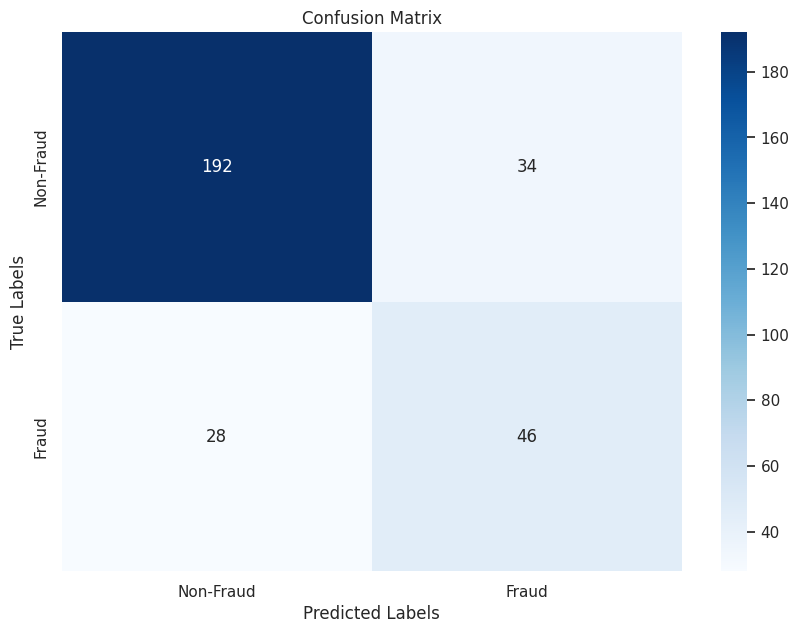

In [115]:
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisation de la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Fraud', 'Fraud'], 
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [116]:
models = pd.DataFrame({
    'Model' : ['LogisticRegression','SVM', 'KNN', 'Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boost', 'XGBoost'],
    'Score' : [log_reg_acc_test,svc_test_acc,knn_test_acc, dtc_test_acc, rand_clf_test_acc, ada_test_acc, gb_test_acc,xgb_test_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
7,XGBoost,0.793333
3,Decision Tree,0.790000
5,Ada Boost,0.790000
1,SVM,0.783333
0,LogisticRegression,0.776667
4,Random Forest,0.776667
6,Gradient Boost,0.766667
2,KNN,0.623333


/tmp/ipykernel_50757/961321731.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot =sns.barplot(data=models,x='Score', y='Model',palette='bright',order=models.sort_values('Score',ascending=False).Model,ax=ax)


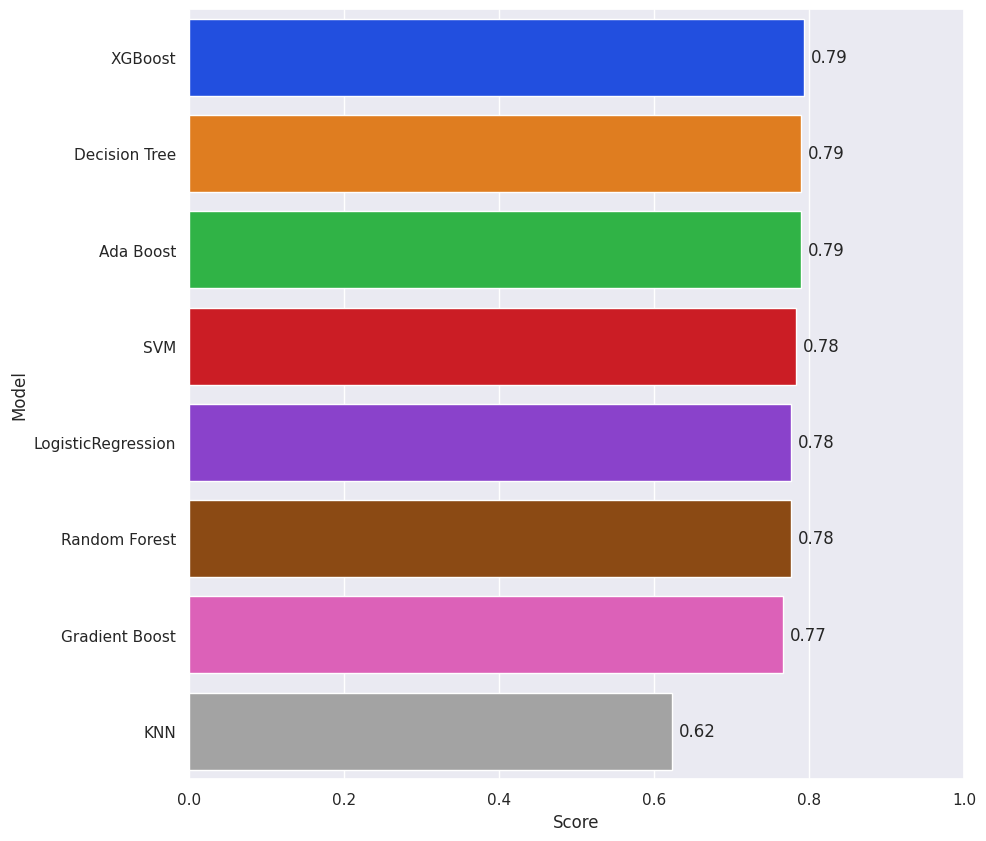

In [117]:
fig,ax = plt.subplots(figsize=(10,10))
barplot =sns.barplot(data=models,x='Score', y='Model',palette='bright',order=models.sort_values('Score',ascending=False).Model,ax=ax)
ax.set(xlim=(0,1))
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Enregistrement du model

In [118]:
pip install==Joblib 1.4.2

ERROR: unknown command "install==Joblib" - maybe you meant "install"
Note: you may need to restart the kernel to use updated packages.


In [119]:
import joblib

# Enregistrer le modèle
joblib.dump(xgb, "XGBoost.pkl")

['XGBoost.pkl']

In [ ]:
#pickle_out = open("XGBoost.pkl", "wb")
#pickle.dump(XGBoost,pickle_out)
#pickle_out.close()

# Fin